In [526]:
"""
Quantum Addition Circuit
Kvantový sčítačový obvod

This program simulates a quantum circuit for binary addition using the quantum Fourier transform using Qiskit.

Author: Michal Forgó

Time: 02.12.2025

Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.
Poznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.
"""

'\nQuantum Addition Circuit\nKvantový sčítačový obvod\n\nThis program simulates a quantum circuit for binary addition using the quantum Fourier transform using Qiskit.\n\nAuthor: Michal Forgó\n\nTime: 02.12.2025\n\nNote: Ensure you have installed the requirements.txt or environment.yml before running this notebook.\nPoznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.\n'

In [527]:
import math
import operator
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


In [528]:
while True:
    # Get two binary numbers (max 7 bits)
    # Získejte dvě binární čísla (max 7 bitů)
    firstBinaryNumber = input("Enter a 7-bit or less binary number: ")
    secondBinaryNumber = input("Enter another 7-bit or less binary number: ")

    # Validate input length and that input contains only 1s or 0s
    # Ověření délky vstupu a toho že vstup obsahuje pouze 1 nebo 0
    if len(firstBinaryNumber) > 8 or len(secondBinaryNumber) > 8 or \
    not set(firstBinaryNumber).issubset({'0','1'}) or not set(secondBinaryNumber).issubset({'0','1'}):
        print("Please enter valid inputs. Try again.")  # Error message / Chybová zpráva
    else:
        break  # Exit loop if input is valid / Ukončí smyčku, pokud je vstup platný

# Binary numbers to add
#firstBinaryNumber = "1011"  
#secondBinaryNumber = "100" 

# Ensure both numbers have the same length
if len(firstBinaryNumber) < len(secondBinaryNumber):
    firstBinaryNumber, secondBinaryNumber = secondBinaryNumber, firstBinaryNumber

secondBinaryNumber = "0" * (len(firstBinaryNumber) - len(secondBinaryNumber)) + secondBinaryNumber
maxInputLength = len(firstBinaryNumber)

In [529]:

# Quantum registers
regA = QuantumRegister(maxInputLength + 1, "regA")
regB = QuantumRegister(maxInputLength + 1, "regB")
regC = ClassicalRegister(maxInputLength + 1, "regC")
qc = QuantumCircuit(regA, regB, regC, name="qc")


In [530]:

# Initialize qubits
for idx, val in enumerate(firstBinaryNumber):
    if val == "1":
        qc.x(regA[maxInputLength - (idx + 1)])
for idx, val in enumerate(secondBinaryNumber):
    if val == "1":
        qc.x(regB[maxInputLength - (idx + 1)])


In [531]:

# Quantum Fourier Transform (QFT)
for idxQubitOne in range(maxInputLength + 1):
    qc.h(regA[idxQubitOne])
    for idxQubitTwo in range(idxQubitOne):
        qc.cp(math.pi / float(2 ** (idxQubitOne - idxQubitTwo)), regA[idxQubitTwo], regA[idxQubitOne])

# Evolve QFT (adding second number)
for idxQubitOne in range(maxInputLength + 1):
    for idxQubitTwo in range(idxQubitOne + 1):
        qc.cp(math.pi / float(2 ** (idxQubitOne - idxQubitTwo)), regB[idxQubitTwo], regA[idxQubitOne])

# Inverse QFT
for idxQubitOne in reversed(range(maxInputLength + 1)):
    for idxQubitTwo in range(idxQubitOne):
        qc.cp(-math.pi / float(2 ** (idxQubitOne - idxQubitTwo)), regA[idxQubitTwo], regA[idxQubitOne])
    qc.h(regA[idxQubitOne])


01000001 1000000 0000001


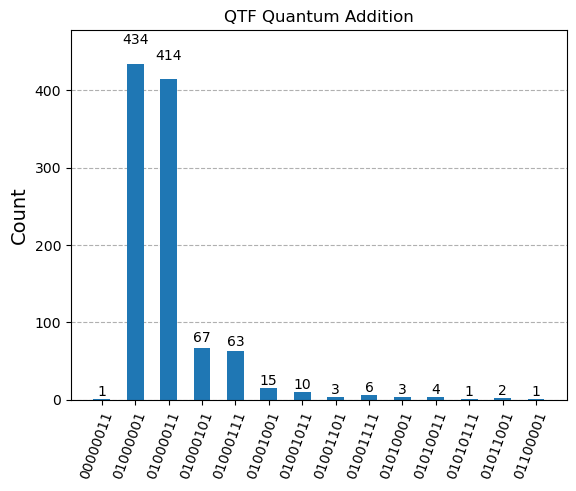

In [ ]:

# Measure qubits
for idx in range(maxInputLength + 1):
    qc.measure(regA[idx], regC[idx])

# Transpile and simulate the circuit
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

# Extract and print the most probable output
output = max(counts.items(), key=operator.itemgetter(1))[0]
print(output, firstBinaryNumber, secondBinaryNumber)

# Draw circuit and plot histogram
#qc.draw("mpl")
plot_histogram(counts, title='QFT Quantum Addition')
